In [2]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv(r'C:\Users\chau\Desktop\ML-miniproject\data\encoded_data.csv', encoding='Latin-1')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,y
0,-0.041801,0.293820,0.787602,0.829546,0.125138,-0.543157,-1.053651,0.39614,0.267505,0.309577,1.056282,0.713333,-0.743793,-0.451068,1
1,-0.041801,-0.078589,0.787602,0.829546,0.125138,-0.320728,-1.053651,0.39614,0.267505,0.429025,1.056282,0.713333,-0.743793,-0.451068,0
2,-0.041801,0.293820,-0.655721,-0.568280,0.125138,0.282929,0.949081,0.39614,-3.738249,0.667919,0.364740,-0.808483,-0.150823,-0.451068,0
3,-0.041801,0.666230,0.787602,-0.568280,0.125138,-0.321281,-1.053651,0.39614,0.267505,-1.004342,1.056282,-1.569391,-0.743793,-0.451068,0
4,1.235427,1.038639,0.787602,-0.568280,0.125138,-0.677611,-1.053651,0.39614,0.267505,0.309577,-1.018342,-0.047575,-0.743793,0.306108,0


In [19]:
X = df.drop(columns='y')
y = df.y

In [6]:
bank_full = pd.read_csv(r'C:\Users\chau\Desktop\ML-miniproject\data\bank-full-encoded.csv', encoding= 'Latin-1')
X_imb = bank_full.drop(columns = 'y')
y_imb = bank_full.y

X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X_imb, y_imb, test_size = 0.2)

In [7]:
train_set_imb = pd.concat([X_train_imb, y_train_imb], axis=1)
test_set_imb = pd.concat([X_test_imb, y_test_imb], axis = 1)
train_set_imb.to_csv(r'C:\Users\chau\Desktop\ML-miniproject\data\train_set_imb.csv', index = False, header = True)
test_set_imb.to_csv(r'C:\Users\chau\Desktop\ML-miniproject\data\test_set_imb.csv', index = False, header = True)

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit
# Here we split the data into training and test sets and implement a stratified shuffle split.
stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
X = df.drop(columns='y')
y = df.y

for train_set, test_set in stratified.split(X, X["loan"]):
    stratified_train = X.loc[train_set]
    stratified_test = X.loc[test_set]
    
stratified_train["loan"].value_counts()/len(stratified_train)
stratified_train.reset_index(drop = 1)
y_train = y[stratified_train.index]
y_test = y[stratified_test.index]

In [23]:
train_set = pd.concat([stratified_train, y_train], axis = 1)
test_set = pd.concat([stratified_test, y_test], axis= 1)

train_set.to_csv(r'C:\Users\chau\Desktop\ML-miniproject\data\train_set.csv', index = False, header=True)
test_set.to_csv(r'C:\Users\chau\Desktop\ML-miniproject\data\test_set.csv', index = False, header=True)

# 1. KNN model

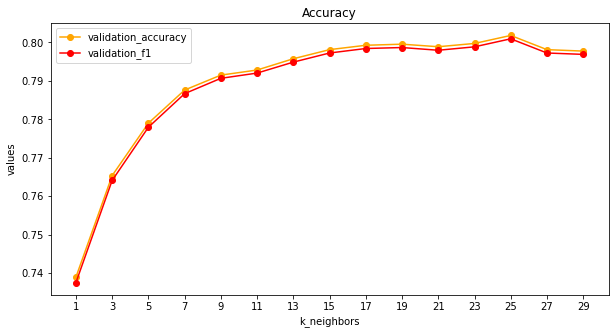

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
val_accuracy = []
val_f1 = []
k_neighbors = []
for k in range(1,30,2):
    model = KNeighborsClassifier(n_neighbors=k, weights='uniform', p = 1)
    kf = StratifiedKFold(n_splits=10, shuffle = True, random_state=1)
    val_accuracy.append(cross_val_score(model, X, y, scoring= 'accuracy', cv = kf).mean())
    val_f1.append(cross_val_score(model, X, y, scoring= 'f1_macro', cv = kf).mean())
    k_neighbors.append(k)

plt.subplots(figsize = (10,5))
plt.plot(k_neighbors, val_accuracy,'-ok', label = 'validation_accuracy', color = 'orange')
plt.plot(k_neighbors, val_f1,'-ok', label = 'validation_f1', color = 'red')
plt.title('Accuracy')
plt.xlabel("k_neighbors")
plt.ylabel("values")
plt.xticks(k_neighbors)
plt.legend()
plt.show()

In [10]:
import pickle
model = KNeighborsClassifier(n_neighbors= 25, weights= 'uniform', p = 1)
model.fit(stratified_train, y_train)
filename = r'C:\Users\chau\Desktop\ML-miniproject\models\knn_model.sav'
pickle.dump(model, open(filename,'wb'))

In [11]:
model_imb = KNeighborsClassifier(n_neighbors=25, weights='uniform', p = 1)
model_imb.fit(X_train_imb, y_train_imb)
pickle.dump(model_imb, open(r'C:\Users\chau\Desktop\ML-miniproject\models\knn_model_imb.sav', 'wb'))

# 2. Decision tree model

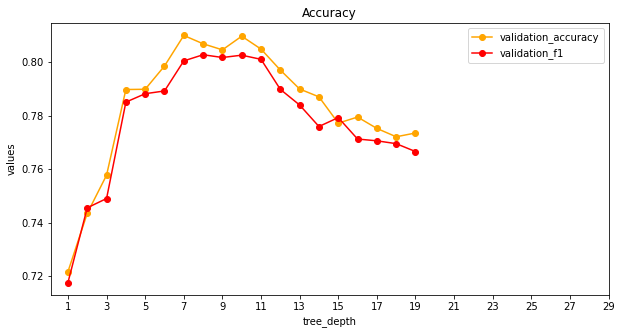

In [12]:
from sklearn.tree import DecisionTreeClassifier
val_accuracy = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    kf = StratifiedKFold(n_splits=10, shuffle = True, random_state=1)
    val_accuracy.append(cross_val_score(tree_clf, X, y, scoring= 'accuracy', cv = kf).mean())
    val_f1.append(cross_val_score(tree_clf, stratified_train, y_train, scoring= 'f1_macro', cv = kf).mean())
    tree_depths.append(depth)
    

plt.subplots(figsize = (10,5))
plt.plot(tree_depths, val_accuracy,'-ok', label = 'validation_accuracy', color = 'orange')
plt.plot(tree_depths, val_f1,'-ok', label = 'validation_f1', color = 'red')
plt.title('Accuracy')
plt.xlabel("tree_depth")
plt.ylabel("values")
plt.xticks(k_neighbors)
plt.legend()
plt.show()

In [13]:
#from the graph above we see max_depth = 7 produces the best result

import pickle
tree_clf = DecisionTreeClassifier(max_depth=7)
tree_clf.fit(stratified_train, y_train)
filename = r'C:\Users\chau\Desktop\ML-miniproject\models\dt_model.sav'
pickle.dump(tree_clf, open(filename,'wb'))

In [14]:
tree_clf_imb = DecisionTreeClassifier(max_depth=7)
tree_clf_imb.fit(X_train_imb, y_train_imb)
pickle.dump(tree_clf_imb, open(r'C:\Users\chau\Desktop\ML-miniproject\models\dt_model_imb.sav','wb'))